# Aim : Identify music features that determine the popularity of music tracks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
# load the dataset
music_data = pd.read_csv('musicdata.csv')

In [3]:
music_data.head()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Bijlee Bijlee,Harrdy Sandhu,Bijlee Bijlee,3tG0IGB24sRhGFLs5F1Km8,1iZLpuGMr4tn1F5bZu32Kb,70,2021-10-30,168450,False,...,0.670,1,-5.313,0,0.1430,0.2690,0.000000,0.0733,0.643,100.004
1,1,Expert Jatt,Nawab,Expert Jatt,2gibg5SCTep0wsIMefGzkd,7rr6n1NFIcQXCsi43P0YNl,65,2018-01-18,199535,False,...,0.948,6,-2.816,0,0.1990,0.2980,0.000000,0.0784,0.647,172.038
2,2,"Kaun Nachdi (From ""Sonu Ke Titu Ki Sweety"")","Guru Randhawa, Neeti Mohan",High Rated Gabru - Guru Randhawa,6EDbwGsQNQRLf73c7QwZ2f,3s7m0jmCXGcM8tmlvjCvAa,64,2019-03-02,183373,False,...,0.830,4,-3.981,0,0.0455,0.0357,0.000000,0.0419,0.753,127.999
3,3,Na Na Na Na,J Star,Na Na Na Na,4xBqgoiRSOMU1VlKuntVQW,5GjxbFTZAMhrVfVrNrrwrG,52,2015,209730,False,...,0.863,3,-3.760,1,0.0413,0.3760,0.000014,0.0916,0.807,95.000
4,4,Patiala Peg,Diljit Dosanjh,Do Gabru - Diljit Dosanjh & Akhil,1uxDllRe9CPhdr8rhz2QCZ,6TikcWOLRsPq66GBx2jk67,46,2018-07-10,188314,False,...,0.811,5,-3.253,0,0.1840,0.0259,0.000000,0.3110,0.835,175.910


In [4]:
#column info and summary statistics
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   Track Name        94 non-null     object 
 2   Artists           94 non-null     object 
 3   Album Name        94 non-null     object 
 4   Album ID          100 non-null    object 
 5   Track ID          100 non-null    object 
 6   Popularity        100 non-null    int64  
 7   Release Date      100 non-null    object 
 8   Duration (ms)     100 non-null    int64  
 9   Explicit          100 non-null    bool   
 10  External URLs     100 non-null    object 
 11  Danceability      100 non-null    float64
 12  Energy            100 non-null    float64
 13  Key               100 non-null    int64  
 14  Loudness          100 non-null    float64
 15  Mode              100 non-null    int64  
 16  Speechiness       100 non-null    float64
 17

The Track Name , Artists and Album name contains null values.

In [5]:
#check for null values
music_data.isnull().sum()

Unnamed: 0          0
Track Name          6
Artists             6
Album Name          6
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

# Data Cleaning

In [6]:
# dropping the 'Unnamed: 0' column
music_data_cleaned = music_data.drop(columns=['Unnamed: 0'])

In [7]:
# handling missing values by filling them with placeholder text
columns_with_missing_values = ['Track Name', 'Artists', 'Album Name']
music_data_cleaned[columns_with_missing_values] = music_data_cleaned[columns_with_missing_values].fillna('Unknown')

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


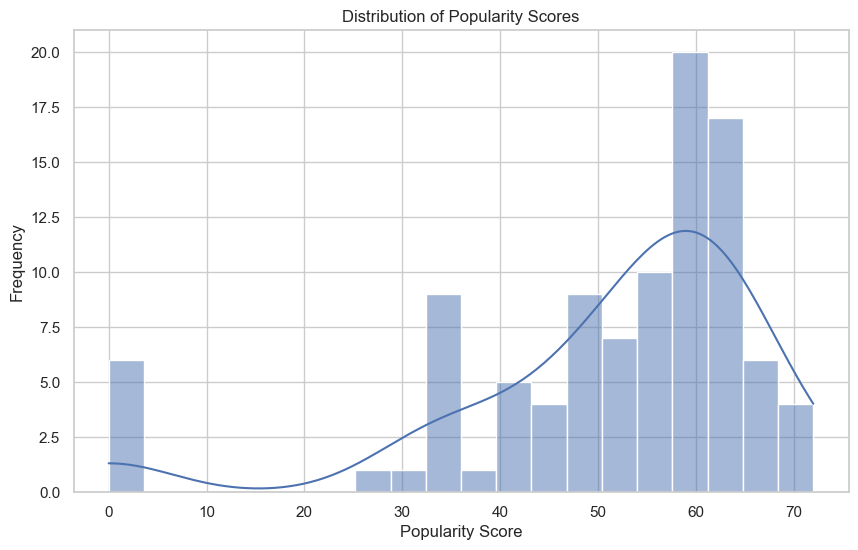

In [8]:
# Distribution of the Popularity score 
plt.figure(figsize=(10, 6))
sns.histplot(music_data_cleaned['Popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

The distribution of popularity scores shows a range mainly between 40 to 70, with peaks around the 50s and 60s. This indicates that most tracks in this dataset have moderate to high popularity.

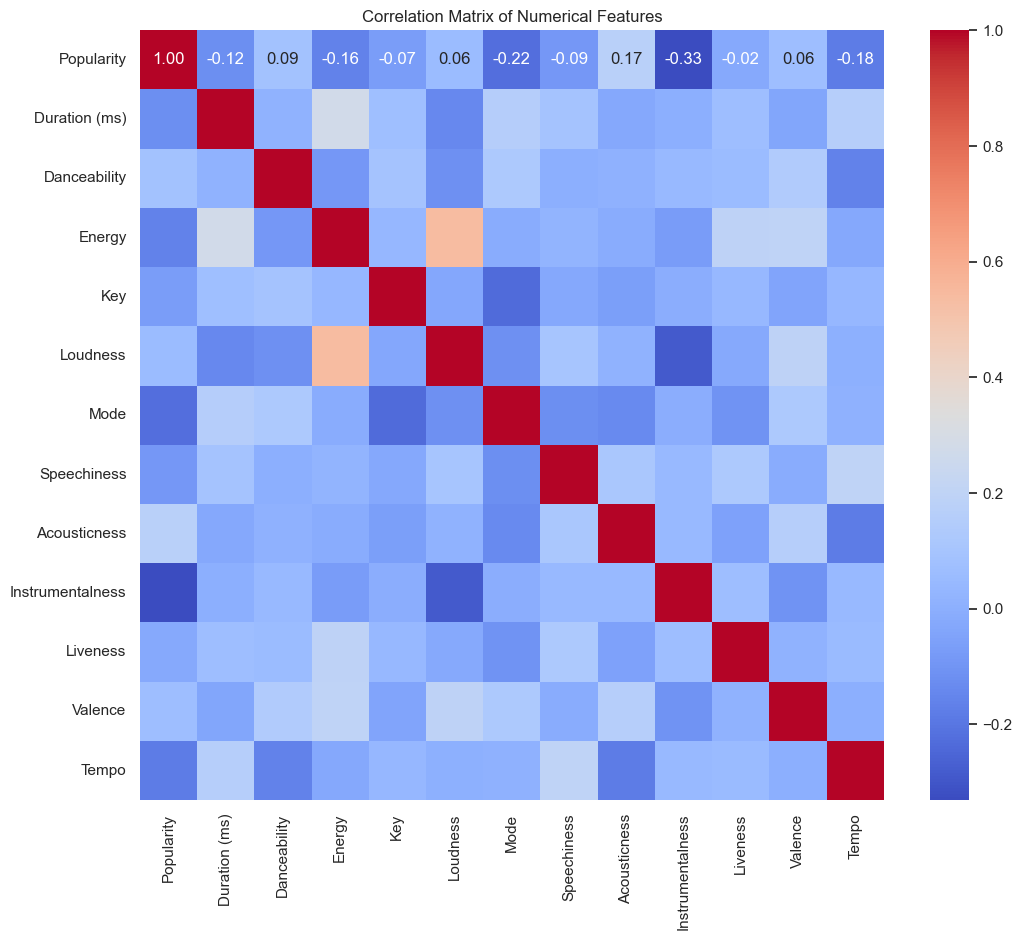

In [9]:
# correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = music_data_cleaned.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Popularity seems to have positive correlation with Loudness and Energy, while it has slight negative correlations with Acousticness. This suggests that louder and more energetic tracks tend to be more popular, while more acoustic tracks tend to be less popular.
Danceability and Valence (the musical positiveness conveyed by a track) also show some positive correlation with popularity.

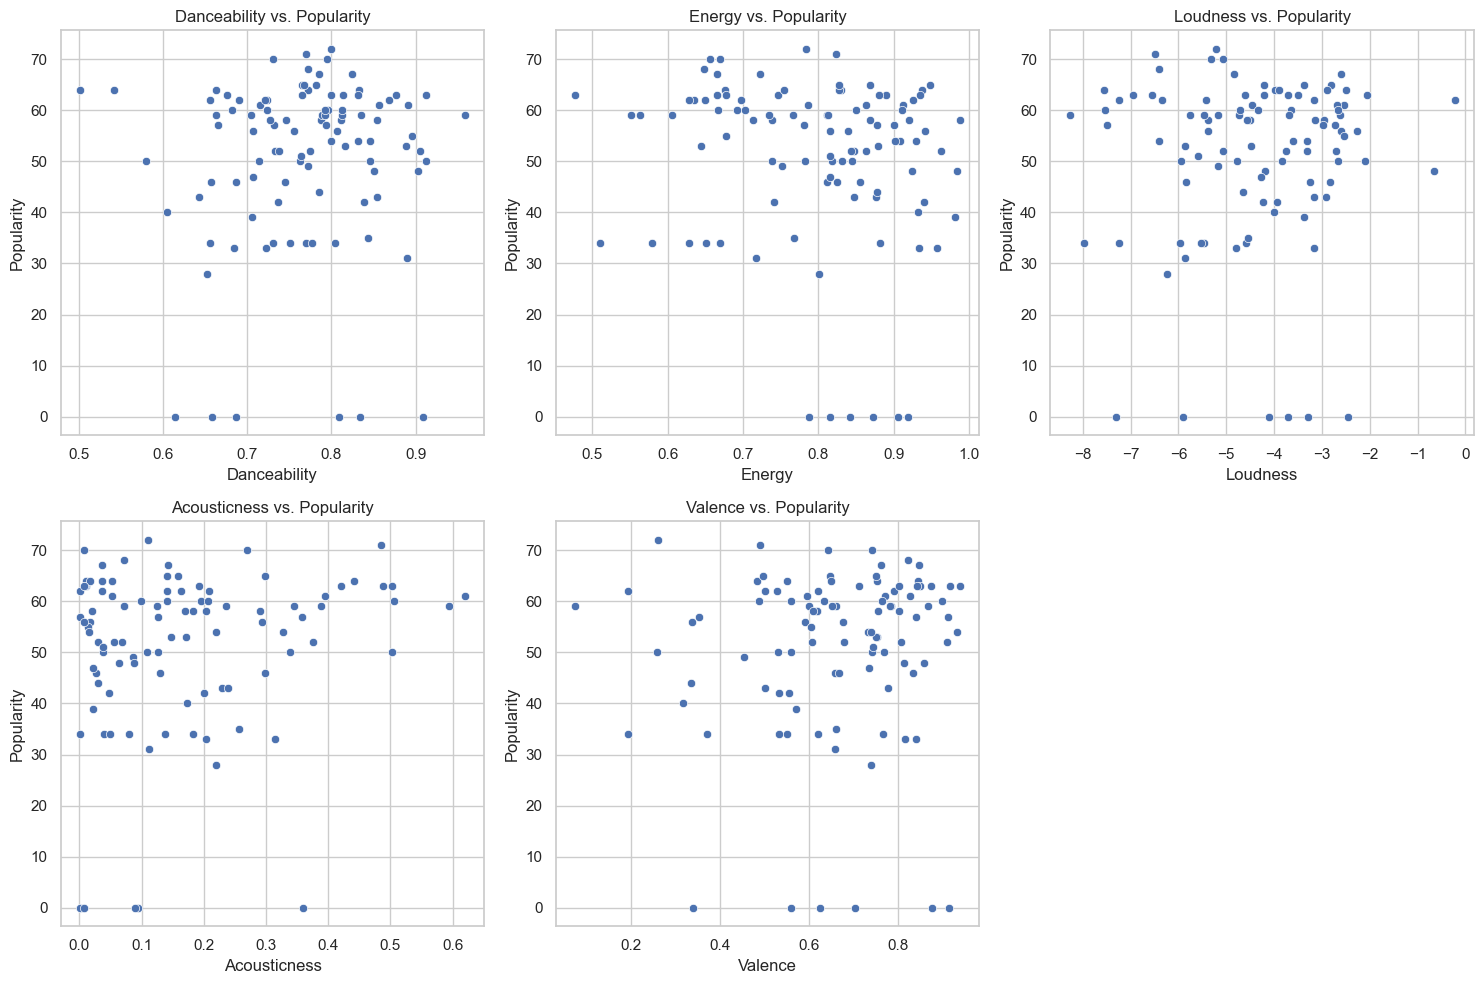

In [10]:
# creating scatter plots for various features vs. popularity
features = ['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Valence']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=music_data_cleaned[feature], y=music_data_cleaned['Popularity'])
    plt.title(f'{feature} vs. Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

Danceability vs. Popularity -> Higher danceability scores tend to correlate with moderate to high popularity. This suggests that more danceable tracks are generally more popular.

Energy vs. Popularity -> Higher energy levels in tracks often correlate with higher popularity which aligns with the trend that energetic tracks are more preferred by listeners.

Loudness vs. Popularity -> Louder tracks tend to have higher popularity scores which reflect listener preference for more vibrant and powerful sound profiles.

Acousticness vs. Popularity -> It shows inverse relationship with popularity, where tracks with lower acousticness tend to be more popular. This shows that highly acoustic tracks are less favoured in the dataset’s music genre context.

Valence vs. Popularity -> Tracks with higher valence, which indicates a happier or more positive tone, show a slight tendency towards higher popularity. This might imply that listeners prefer tracks that have a positive emotional tone.

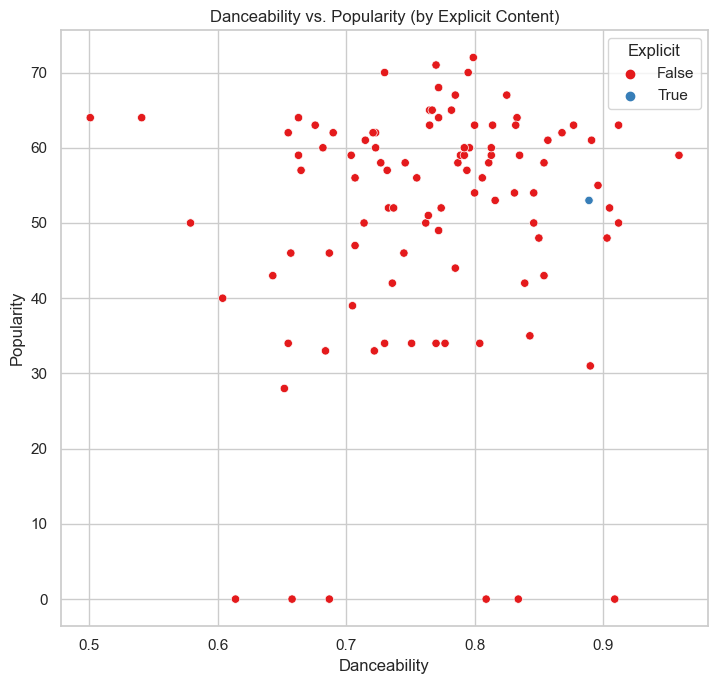

In [14]:
#creating plots for danceability vs. popularity segmented by explicit content
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Danceability', y='Popularity', hue='Explicit', data=music_data_cleaned, palette='Set1')
plt.title('Danceability vs. Popularity (by Explicit Content)')
plt.xlabel('Danceability')
plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

Both explicit and non-explicit tracks show a positive trend between danceability and popularity. However, explicit tracks tend to cluster slightly higher on the popularity scale at similar levels of danceability compared to non-explicit tracks.

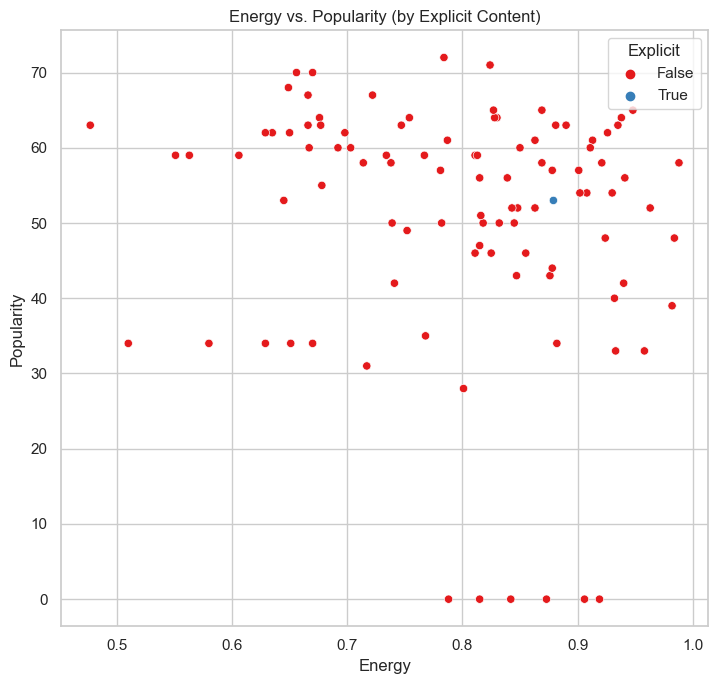

In [15]:
#creating plots for energy vs. popularity segmented by explicit content
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
sns.scatterplot(x='Energy', y='Popularity', hue='Explicit', data=music_data_cleaned, palette='Set1')
plt.title('Energy vs. Popularity (by Explicit Content)')
plt.xlabel('Energy')
plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

This show Positive relationship between energy and popularity for both explicit and non-explicit tracks. Explicit tracks appear to achieve higher popularity at lower energy levels compared to non-explicit tracks, suggesting that the explicit content may appeal to certain listener groups more, irrespective of energy level.

# Statistical Modelling of Music Features

statistical modelling using Linear Regression

In [16]:
#importing dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [18]:
# preparing the dataset for regression

In [17]:
# convert 'Explicit' from boolean to integer (0 or 1)
music_data_cleaned['Explicit'] = music_data_cleaned['Explicit'].astype(int)

In [19]:
# selecting features and target for the model
features = ['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Valence', 'Explicit', 'Key', 'Mode', 'Speechiness', 'Instrumentalness', 'Tempo']
X = music_data_cleaned[features]
y = music_data_cleaned['Popularity']

In [20]:
# standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
# initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# predicting on the test set
y_pred = model.predict(X_test)

In [24]:
# evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
# outputting the coefficients and performance metrics
coefficients = pd.Series(model.coef_, index=features)
coefficients

Danceability        1.249640e+00
Energy             -3.204815e+00
Loudness            1.141456e+00
Acousticness        2.469403e+00
Valence             2.125671e+00
Explicit           -1.998401e-15
Key                -3.189486e+00
Mode               -5.859715e+00
Speechiness         3.398224e-02
Instrumentalness    3.390750e-01
Tempo              -1.865736e+00
dtype: float64

The output above represents the coefficients from the regression model quantifying the impact of various musical features on track popularity. A positive coefficient indicates that an increase in the feature is associated with an increase in popularity, and vice versa for a negative coefficient.

# Statistical modelling

 It is a mathematical framework used to describe the relationships between variables in the form of equations, usually involving stochastic elements (randomness). It is primarily focused on inference, which means understanding the relationships between variables and quantifying how certain factors influence outcomes.